In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from google.colab import files
import io

uploaded = files.upload()   # Upload survey_sample.csv
fname = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[fname]))
df.head()


Saving survey_sample.csv to survey_sample.csv


,Age,Gender,Country,Experience,Salary
0,56,Male,UK,1-3,60000
1,46,Male,USA,1-3,40000
2,32,Female,India,1-3,20000
3,25,Male,India,3-5,100000
4,38,Male,Germany,3-5,60000


In [2]:
print('Shape:', df.shape)
print('\nMissing values:', df.isnull().sum())
print('\nDuplicates:', df.duplicated().sum())

Shape: (50, 5)

Missing values: Age           0
Gender        0
Country       0
Experience    0
Salary        0
dtype: int64

Duplicates: 0


In [3]:
# Cleaning steps
df = df.drop_duplicates()
df['Salary'] = df['Salary'].replace(0, np.nan)
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df.to_csv('survey_cleaned.csv', index=False)
df.head()

,Age,Gender,Country,Experience,Salary
0,56,Male,UK,1-3,60000.0
1,46,Male,USA,1-3,40000.0
2,32,Female,India,1-3,20000.0
3,25,Male,India,3-5,100000.0
4,38,Male,Germany,3-5,60000.0


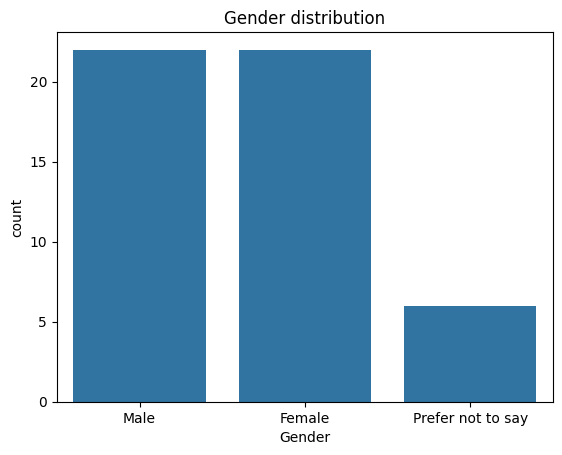

In [4]:
sns.countplot(x='Gender', data=df)
plt.title('Gender distribution')
plt.show()

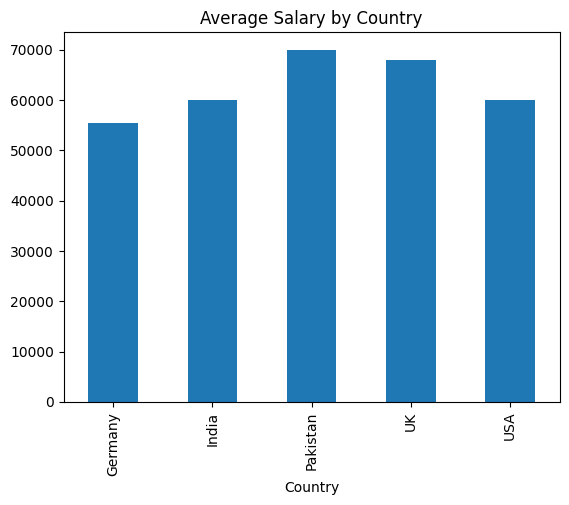

In [5]:
df.groupby('Country')['Salary'].mean().plot(kind='bar')
plt.title('Average Salary by Country')
plt.show()

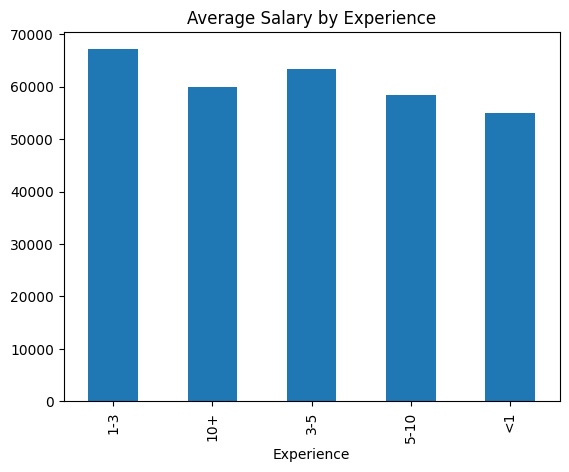

In [6]:
df.groupby('Experience')['Salary'].mean().plot(kind='bar')
plt.title('Average Salary by Experience')
plt.show()